In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%cd ..

In [3]:
import torch
from som import som_learner, UnsupervisedDataset, SomInterpretation

In [4]:
from torch import Tensor
from sklearn.datasets import load_iris
from typing import Tuple
from itertools import combinations_with_replacement

def iris():
    "Loads the IRIS dataset into two tensors."
    iris = load_iris()
    x = torch.tensor(iris.data)
    y = torch.tensor(iris.target)
    labels = iris.feature_names
    map_size = (4,4)
    alpha = 0.3
    bs = 10
    epochs = 30
    return x, y, labels, map_size, alpha, bs, epochs
    
def colors(n: int = 11000):
    "Loads a dataset containing all possible RGB color combinations"
#     x = torch.zeros(n, 3).normal_(mean=80.0, std=127.0).long().float()
    x = torch.zeros(n, 3).uniform_(0, 255).long().float()
    y = None
    labels = ['Red', 'Green', 'Blue']
    map_size = (10, 10)
    alpha = 0.03
    bs = 25
    epochs = 100
    return x, y, labels, map_size, alpha, bs, epochs


def colors_small():
    "Loads a dataset containing all possible RGB color combinations"
    x = torch.FloatTensor([
        [3, 255, 0],
        [0, 247, 3],
        [0, 252, 5],
        [3, 239, 8],
        [0, 232, 3],
        [3, 255, 0],
        [0, 250, 5],
        [255, 3, 0],
        [247, 3, 0],
        [252, 5, 0],
        [239, 8, 3],
        [232, 0, 3],
        [255, 3, 3],
        [249, 5, 3],
        [247, 3, 5],
        [3, 0, 255],
        [3, 0, 247],
        [5, 0, 252],
        [8, 2, 239],
        [0, 3, 232],
        [3, 3, 255],
        [5, 3, 249],
        [3, 5, 247],
        [8, 3, 234],
        [3, 5, 247],
        [5, 3, 234],
    ])
    y = None
    labels = ['Red', 'Green', 'Blue']
    map_size = (3, 3)
    alpha = 0.01
    bs = 4
    epochs = 100
    return x, y, labels, map_size, alpha, bs, epochs

def uniform(n: int = 11000, s: int = 3):
    "Loads a uniform dataset"
    x = torch.randn(n, s)
    y = None
    labels = list(range(s))
    map_size = (6, 6)
    alpha = 0.03
    bs = 50
    epochs = 150
    return x, y, labels, map_size, alpha, bs, epochs
    

In [5]:
x, y, labels, map_size, alpha, bs, epochs = colors()

In [6]:
x.shape

torch.Size([11000, 3])

In [7]:
size = (map_size[0], map_size[1], x.shape[-1])
size

(10, 10, 3)

In [8]:
x[0]

tensor([199.,  21.,   3.])

In [9]:
x.shape

torch.Size([11000, 3])

In [10]:
ud = UnsupervisedDataset.create(train=x, valid=0.1, bs=bs, normalizer='minmax', shuffle=False)

In [11]:
ud.train.shape, ud.valid.shape

(torch.Size([9900, 3]), torch.Size([1100, 3]))

In [12]:
ud.train.mean(), ud.train.std()

(tensor(127.2676, device='cuda:0'), tensor(73.2520, device='cuda:0'))

In [13]:
alpha, bs, epochs

(0.03, 25, 100)

[running kmeans]: 10it [00:00, 54.74it/s, center_shift=0.167619, iteration=11, tol=0.000100]

running k-means on cuda..


[running kmeans]: 52it [00:00, 58.00it/s, center_shift=0.000084, iteration=52, tol=0.000100]


<IPython.core.display.Javascript object>


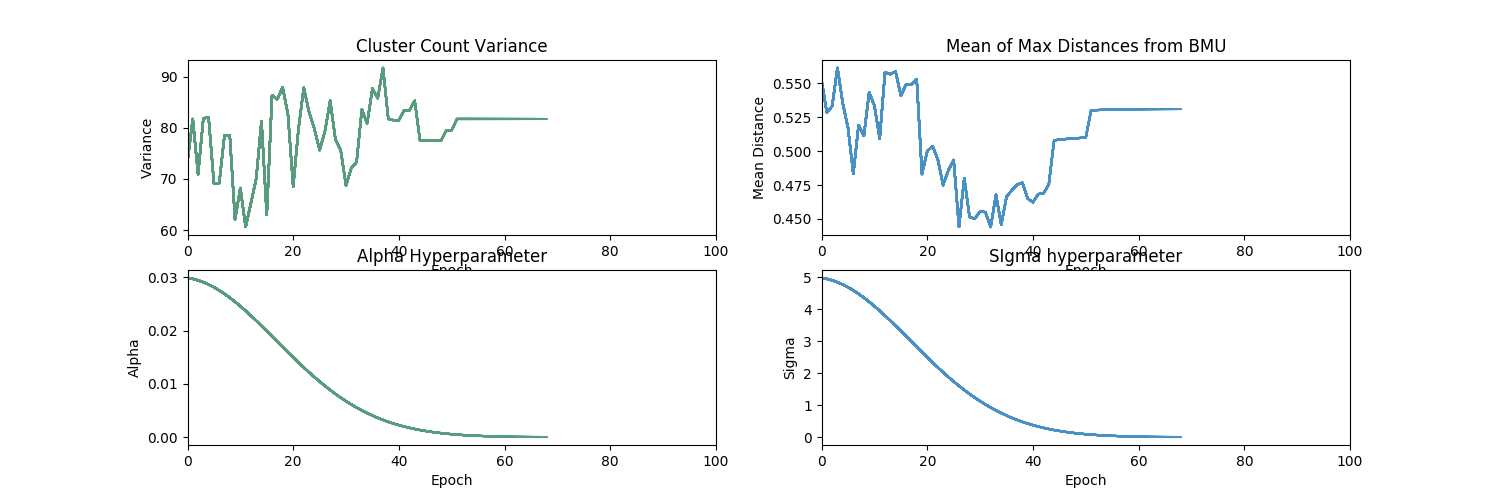

<IPython.core.display.Javascript object>


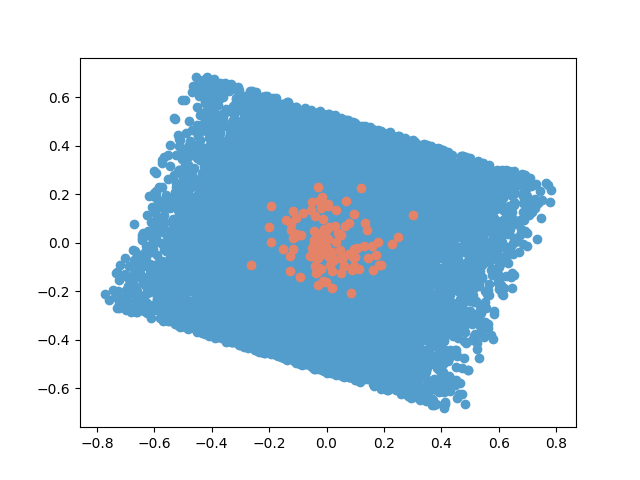

KeyboardInterrupt: Early Stopping due to weight update below tolerance of 0.0001

In [15]:
%matplotlib notebook
learn = som_learner(ud, map_size=map_size, init='kmeans_euclidean', alpha=alpha)
learn.fit(epochs, visualize_dim=2, visualize=True, debug=False, plot_hyperparams=True)

In [ ]:
interp = SomInterpretation.from_learner(learn)

In [ ]:
%matplotlib inline
interp.show_hitmap()

In [ ]:
interp.show_omni_heatmap()

In [ ]:
interp.show_feature_heatmaps(labels=labels)

In [ ]:
def pwd(x, y):
    n = x.size(0)
    m = y.size(0)
    d = x.size(1)

    x = x.unsqueeze(1).expand(n, m, d)
    y = y.unsqueeze(0).expand(n, m, d)
    
#     if self.training:
#         self._diffs = x - y
#         return self._diffs.pow(2).sum(2).sqrt()
    
    return torch.pow(x - y, 2).sum(2).sqrt()

## TODO

- Get the BMU of each node
- Associate the BMU to its weight vector
- Calculate difference of each input value and its BMU weight
- Calculate variance of each cluster


- Mean of max distance from own BMU

# Dataset Exploration

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(ud.train.cpu().numpy())
df.head()

In [ ]:
df.describe()

In [ ]:
df = pd.DataFrame(learn.model.weights.view(-1, 3).cpu().numpy())
df.head()

In [ ]:
df.describe()

In [ ]:
import seaborn as sns
import pandas as pd
import time
import matplotlib.pyplot as plt

In [ ]:
sns.set_palette("husl")

In [ ]:
#importing libraries
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline

fig = plt.figure()
#creating a subplot 
ax1 = fig.add_subplot(1,1,1)

def animate(i):
    data = open('stock.txt','r').read()
    lines = data.split('\n')
    xs = []
    ys = []
   
    for line in lines:
        x, y = line.split(',') # Delimiter is comma    
        xs.append(float(x))
        ys.append(float(y))
    
    ax1.clear()
    ax1.plot(xs, ys)

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Live graph with matplotlib')	

    
ani = animation.FuncAnimation(fig, animate, interval=1000) 
plt.show()